# Exploratory data analysis
Introduction to exploratory data analysis (EDA).

EDA is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task [(source 1)](https://chartio.com/learn/data-analytics/what-is-exploratory-data-analysis/). It is used to explore the data, find different patterns, relations, and anomalies in the data using some statistical graphs and other visualization techniques, and possibly formulate hypotheses that could lead to new data collection and experiments [(source 2)](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/). More specifically, EDA enables analysts to:
1. get maximum insights from a data set
2. uncover underlying structure
3. extract important variables from the dataset
4. detect outliers and anomalies (if any)
5. test underlying assumptions
6. determine the optimal factor settings

## EDA steps and tools
Practical steps in conducting EDA and frequently used EDA tools.
Based on *pandas2020-main.Sales_Analysis_Pandas_P3_tutorial.ipynb* and *pandas2020-main.TED_Talks_Pandas_P3_tutorial.ipynb*.


### Reading the dataset
`read_csv()`

### Initial examination and adaptations
`shape`, `head()`, `tail()`, `sample()`, `info()`, `dtypes`
`columns`, `columns.values`, `columns.values.tolist()`
`index`, `index[<from>:<to>]`, `reset_index(drop=True, inplace=True)`
`<pd.df>.rename({'<column_1 old name>':'<column_1 new name>', '<column_1 old name>':'<column_1 new name>', ...}, axis='columns')`, `<pd.df>.columns = ['<column_1 name>', '<column_2 name>', ...]` (change the names of all columns in <pd.df>), `ast.literal_eval()` (using Python's *ast* module to transform a string into a literal value, a list, a tuple or any other container object)

### Missing values and value counts
`isna()`, `isna().sum()`, `isnull()`, `isnull().sum()` ([example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/))
`value_counts()`, `value_counts(normalize=True)`, `dropna(how='all'/'any', inplace=True)`

### Examining individual data items, rows and columns
`sample()`
Simple indexing and fancy indexing: `iloc()`, `loc()`
Indexing in data stats: `<pd.df>.describe().loc['50%', '<column_name>']` (select the median of <column_name> from the <pd.df> stats computed by describe())
Indexing using list of values: `<pd.df>.loc[<pd.df>.<column>.isin(<list of values>)]` (select those observations where the value of <column> is in the <list of values>)

### Adding and deleting rows and columns
Add/Delete rows and columns to/from a `pd.DataFrame` object.
`<pd.df>['<new column name>'] = ...`
`<pd.df>.drop('<column name>', axis=1, inplace=True)`
`<pd.df>.drop(columns=['<column_1 name>', '<column_2 name>', ...], inplace=True)`
`pd.concat([<pd.df>, <another pd.df with the same number of rows and with different columns>], axis=1))`


### Data transformations
`describe()`
`pd.to_numeric(<pd.DataFrame object>['<column name>'], errors='coerce')`, `pd.DataFrame.to_numpy()`, `pd.Series.to_numpy()`, `pd.to_datetime()`, ...
`<pd.df>.<column>.apply(<f_name>)` (apply the <f_name> function to all elements of each element of the <column>; for example, each element of the <column> can be a list of other elements)


### Exploring correlations
Explore correlations between the (numerical) columns.
`sb.heatmap()`
[Example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/)

### Grouping and sorting data
`nunique()`
`groupby()`
`sort_values(by='<column name>', ascending=False/True)`
`sort_index(inplace=True)`
`agg(['<column_1 name>', '<column_2 name>', ...])`


### Data visualization
Plot some bargraphs, scatterplots, boxplots,...
[Example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/)

### Other
[Other interesting ideas and different ways of using the things from above](https://realpython.com/pandas-python-explore-dataset/#exploring-your-dataset) (see the rest from [that article](https://realpython.com/pandas-python-explore-dataset/) as well).

## Import and configure packages
The `%run` magic does not work well in DataSpell, thus the following `import` statements are copied here from *import_packages.ipynb* (the last line is added subsequently):

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

%config IPCompleter.greedy=True

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')
import pandas as pd
import seaborn as sb

from plotnine import ggplot, aes, geom_line, geom_histogram, theme_xkcd

In [1]:
# %run "import_packages.ipynb"

## Introducing The Beatles dataset

### Read The Beatles songs *csv* file
`pd.read_csv()` returns a `pd.DataFrame` object.

In [2]:
# Get the songs as a pd.DataFrame object
songs = pd.read_csv('data/The Beatles songs dataset, v1, no NAs.csv')

### Explore the dataset (first steps)
Show the columns of the `songs` object (which is a `pd.DataFrame` object).

In [3]:
# Get the columns as a pd.Index object
print(songs.columns)
# Get the columns as a list
print(list(songs.columns))

Index(['Title', 'Year', 'Album.debut', 'Duration', 'Other.releases', 'Genre',
       'Songwriter', 'Lead.vocal', 'Top.50.Billboard'],
      dtype='object')
['Title', 'Year', 'Album.debut', 'Duration', 'Other.releases', 'Genre', 'Songwriter', 'Lead.vocal', 'Top.50.Billboard']


Use Pandas to extract song lengths as a NumPy array.

In [4]:
# Get the song lengths as a pd.Series object
lengths = songs['Duration']
print(lengths.head())

0    174
1    335
2    152
3    104
4    163
Name: Duration, dtype: int64


In [5]:
# Convert the song lengths into a NumPy array
times = lengths.values
print(type(times))
print(times.shape)

<class 'numpy.ndarray'>
(310,)


Plot the histogram of the song lengths using Matplotlib.

As for the plot styles, there are a lot of [available styles](https://www.dunderdata.com/blog/view-all-available-matplotlib-styles) that can be also shown in code using `plt.style.available`. See also [this](https://www.analyticsvidhya.com/blog/2021/08/exploring-matplotlib-stylesheets-for-data-visualization/).

Alternatively, plot style can be set using `sb.set_theme()` (or just `sb.set()`, but that function might get deprecated and removed from *seaborn* in the future). See [`sb_set_theme()` documentation](https://seaborn.pydata.org/generated/seaborn.set_theme.html) for the function's parameters and defaults.

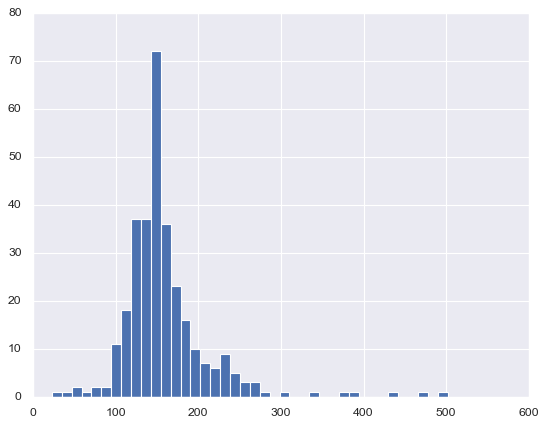

In [20]:
# Set plot style using sb.set_theme()
sb.set_theme()
# Plot the histogram - x: song time in [sec]; y: number of songs; 40 bins
plt.hist(times, 40);

Plot the histogram of the song lengths using *plotnine*.
[Excellent tutorial on plotnine](https://realpython.com/ggplot-python/).

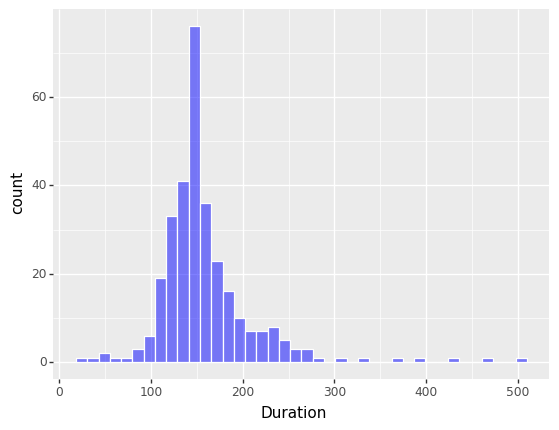

<ggplot: (149834009288)>

In [7]:
# plot = ggplot(songs, aes(x='Duration'))
# plot + geom_histogram(bins=40)
ggplot(songs, aes(x='Duration')) + \
    geom_histogram(bins=40,
                     fill='blue',
                     # color='black',
                     color='white',
                     # size=2,
                     alpha=0.5)

To avoid the annoying text output like `<ggplot: (177159008578)>` under the plot, use the following syntax:

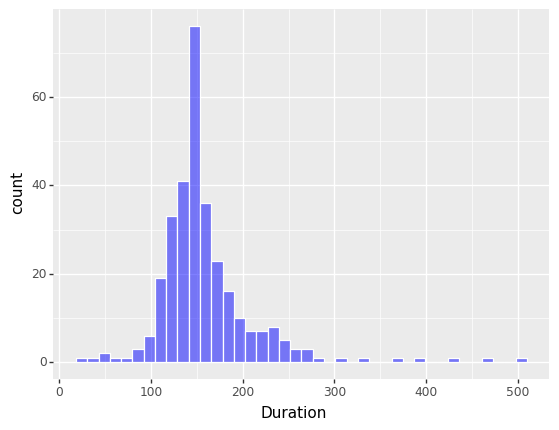

In [8]:
(
        ggplot(songs, aes(x='Duration')) + \
            geom_histogram(bins=40,
                          fill='blue',
                          # color='black',
                          color='white',
                          # size=2,
                          alpha=0.5)
).draw();

## Masking - Boolean arrays as masks

Extract song release years into another NumPy array.

In [9]:
# print(type(songs['Year']))          # <class 'pandas.core.series.Series'>
years = songs['Year'].values
# print(type(years))                  # <class 'numpy.ndarray'>
print(len(years))
print(years[0:10])

310
[1965 1967 1964 1963 1963 1968 1965 1961 1963 1963]


Extract songs released after 1968.

In [10]:
years_gt_1968 = (years > 1968)                           # mask: Boolean array of the same length as years, True if years > 1968
print(years_gt_1968[20:30])                              # get a slice of it

[False False False False False False  True  True False False]


Get the titles of the first 10 songs released after 1968.

In [11]:
# Get the titles of the first 10 songs such that years > 1968
print(songs[years_gt_1968]['Title'].head(10))

10             All Things Must Pass
26    Because I Know You Love Me So
27                          Because
36                Carry That Weight
44                  Come and Get It
45                    Come Together
52                       Dig a Pony
53                           Dig It
59                Don't Let Me Down
68        Fancy My Chances with You
Name: Title, dtype: object


Get the titles of the last 10 songs such that `years > 1968` and `times < 120`.

In [12]:
# Get the titles of the last 10 songs such that years > 1968 and times < 120
times_lt_120 = (times < 120)
print(songs[years_gt_1968 & times_lt_120]['Title'].tail(10))

36                           Carry That Weight
53                                      Dig It
81                             Golden Slumbers
94                                 Her Majesty
173                                 Maggie Mae
175            Mailman, Bring Me No More Blues
179                           Mean Mr. Mustard
208                              Polythene Pam
226    She Came in Through the Bathroom Window
Name: Title, dtype: object


In [13]:
# Get the titles of all songs released 1966 or 1967, as well as the mean value of their lengths
years_1966_1967 = (years >= 1966) & (years <= 1967)
print(songs[years_1966_1967]['Title'])
print()
print('Mean length of songs from 1966-1967:', np.mean(songs[years_1966_1967]['Duration']))

1                                    A Day in the Life
11                                    All Together Now
12                                All You Need Is Love
14                              And Your Bird Can Sing
21                             Baby, You're a Rich Man
28                  Being for the Benefit of Mr. Kite!
31                                        Blue Jay Way
41                      Christmas Time (Is Here Again)
56                                       Doctor Robert
63                                       Eleanor Rigby
69                                       Fixing a Hole
70                                              Flying
71                                          For No One
77                                      Getting Better
82                                   Good Day Sunshine
83                          Good Morning, Good Morning
86                         Got to Get You into My Life
91                                      Hello, Goodbye
96        

## Fancy indexing
Fancy indexing is like simple indexing, but arrays of indices are passed in place of single scalars. <br>
**Important:** The shape of the result is the same as the (possibly broadcasted) shape of the index array, not of the array being indexed.

### Fancy indexing of one-dimensional arrays

In [14]:
np.random.seed(3)
a = np.random.randint(10, size=10)
print(a)
print()

i = [2, 8, 5]                                 # one-dimensional index
print(a[i])
a[i] = 55
print(a)
a[i] -= 10
print(a)
print()

i = np.array([[1, 0],                         # multi-dimensional index
              [2, 4]])
print(a[i])                                   # the shape of the result is the same as the shape of the index array

[8 9 3 8 8 0 5 3 9 9]

[3 9 0]
[ 8  9 55  8  8 55  5  3 55  9]
[ 8  9 45  8  8 45  5  3 45  9]

[[ 9  8]
 [45  8]]


### Fancy indexing of multi-dimensional arrays

In [15]:
m = np.random.randint(10, size=(3, 4))
print(m)
print()

i_row = np.array([0, 2, 1])
i_col = np.array([2, 1, 0])
print(m[i_row, i_col])                        # resulting pairs of indices: [0, 2], [2, 1], [1, 0]
print()

print(m[i_row[:, np.newaxis], i_col])
print()

print(m[2, [2, 0, 1]])
print(m[-2:, [2, 0, 1]])

[[5 7 6 0]
 [4 7 8 1]
 [6 2 2 1]]

[6 2 4]

[[6 7 5]
 [2 2 6]
 [8 7 4]]

[2 6 2]
[[8 4 7]
 [2 6 2]]


## Sorting arrays
What are the longest and the shortest Beatles songs?

`np.sort()`
Returns a sorted copy of an array.

In [16]:
a = np.array([3, 1, 7, 2, 5])
print(a)
print(np.sort(a))                  # a does not change
a.sort()                           # inplace sorting, a changes
print(a)

[3 1 7 2 5]
[1 2 3 5 7]
[1 2 3 5 7]


In [17]:
np.random.seed(0)
m = np.random.randint(10, size=(4, 6))
print(m)
print()

print(np.sort(m, axis=0))                 # sort each column of x, independently 
print()
print(np.sort(m, axis=1))                 # sort each row of x, independently 

[[5 0 3 3 7 9]
 [3 5 2 4 7 6]
 [8 8 1 6 7 7]
 [8 1 5 9 8 9]]

[[3 0 1 3 7 6]
 [5 1 2 4 7 7]
 [8 5 3 6 7 9]
 [8 8 5 9 8 9]]

[[0 3 3 5 7 9]
 [2 3 4 5 6 7]
 [1 6 7 7 8 8]
 [1 5 8 8 9 9]]


`np.argsort()`
Returns the indices that would sort an array.

In [18]:
songs = pd.read_csv('data/The Beatles songs dataset, v1, no NAs.csv')       # get the songs as a pd.DataFrame object
lengths = songs['Duration']                                                 # get the song lengths as a pd.Series object
print(lengths.head())
print()

times = lengths.values                                                      # convert the song lengths into a NumPy array
i = np.argsort(times)                                                       # sort song times from shortest to longest
print(type(i))                                                              # <class 'numpy.ndarray'>
print(i[0:10])                                                              # print the first 10 indices
print(times[i[0:10]])                                                       # print the 10 shortest song times
print()

print(songs['Title'][i])                                                    # fancy-index songs['Title']
print()

print(songs['Title'][i[-10:]])                                              # fancy-index songs['Title'], the 10 longest songs

0    174
1    335
2    152
3    104
4    163
Name: Duration, dtype: int64

<class 'numpy.ndarray'>
[ 94 173  53 288 179 208 223  81 132  36]
[23 40 51 52 66 72 80 91 92 96]

94                     Her Majesty
173                     Maggie Mae
53                          Dig It
288                 Wild Honey Pie
179               Mean Mr. Mustard
                  ...             
283       What's The New Mary Jane
146              It's All Too Much
98                        Hey Jude
120    I Want You (She's So Heavy)
212                   Revolution 9
Name: Title, Length: 310, dtype: object

93                   Helter Skelter
104                 I Am the Walrus
286    While My Guitar Gently Weeps
291          Within You Without You
1                 A Day in the Life
283        What's The New Mary Jane
146               It's All Too Much
98                         Hey Jude
120     I Want You (She's So Heavy)
212                    Revolution 9
Name: Title, dtype: object
